# Data cleaning part for Heart_2020.csv

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_2020.csv')  # Replace 'path_to_your_file.csv' with the path to your dataset

# Display the first few rows of the dataframe
print(df.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [68]:
# Check the shape of the dataframe
print("Dataframe shape:", df.shape)

Dataframe shape: (319795, 18)


In [69]:
# Display data types of each column
print(df.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [70]:
# Summary statistics for numeric columns
print(df.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


In [71]:
# Identify and remove duplicate entries
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [72]:
# Check for missing values
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


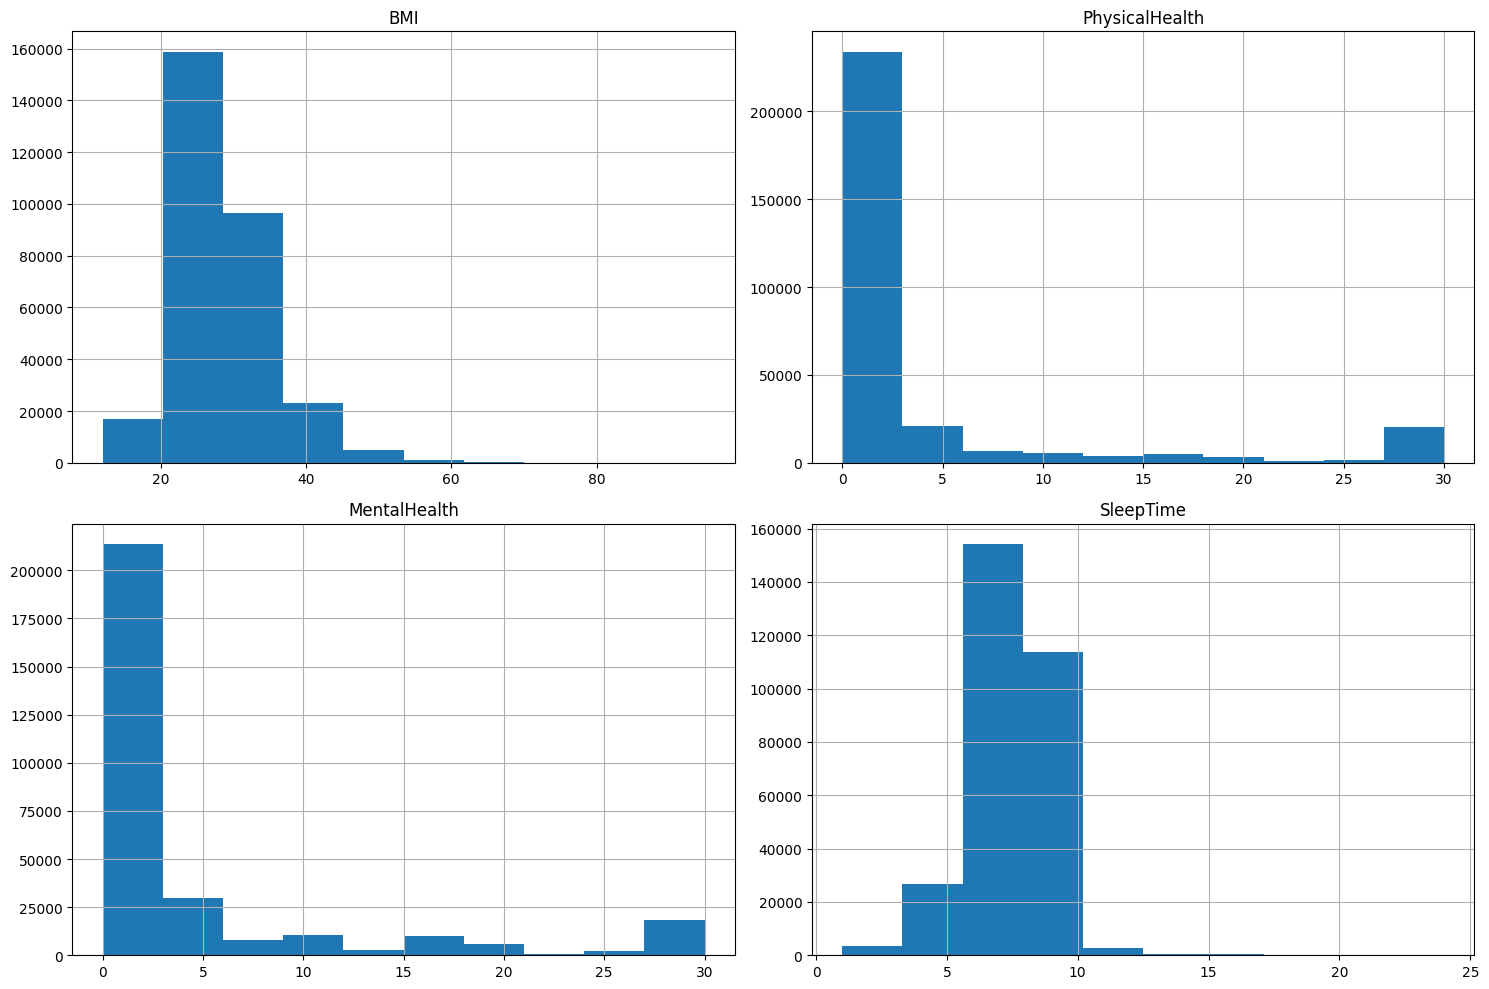

In [73]:
# Visualize the distribution of numeric variables
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

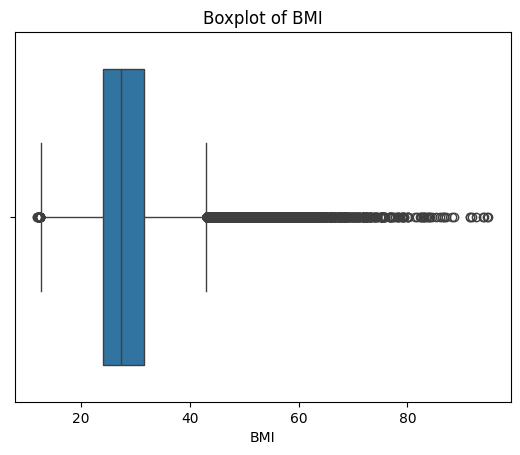

Outliers in 'BMI':
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
32               No  45.35      No              No     No            30.0   
57               No  46.52     Yes              No     No            30.0   
90               No  44.29      No              No     No            30.0   
105              No  58.54      No              No     No            30.0   
107              No  45.42      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319636           No  47.55      No              No     No             0.0   
319693           No  44.29      No              No     No             0.0   
319709           No  51.46     Yes              No     No            30.0   
319725           No  53.16      No              No     No            29.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory   

In [74]:

# using IQR to detect outliners in BMI
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1

# Define bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outlier_indexes_bmi  = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]

# Plotting a boxplot
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()

# Print outliers
print(f"Outliers in 'BMI':")
print(outlier_indexes_bmi )

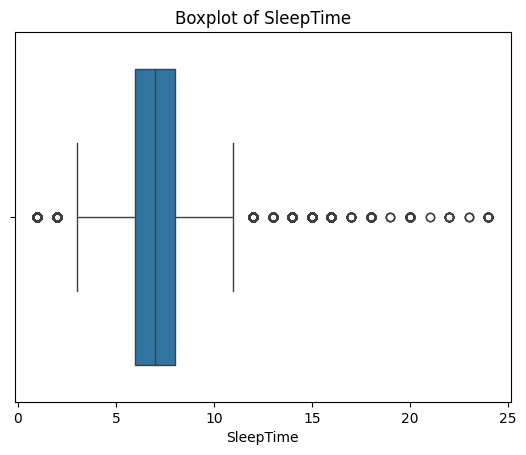

Outliers in 'SleepTime':
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
5               Yes  28.87     Yes              No     No             6.0   
10              Yes  34.30     Yes              No     No            30.0   
50               No  26.61      No              No     No             0.0   
206              No  35.11     Yes              No     No            20.0   
235              No  43.54      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319373           No  24.03      No              No     No            12.0   
319394           No  33.13      No              No     No             0.0   
319408           No  38.86      No              No     No            30.0   
319702           No  24.41      No             Yes     No             0.0   
319793           No  32.81      No              No     No             0.0   

        MentalHealth DiffWalking     Sex AgeCatego

In [75]:

# using IQR to detect outliners in SleepTime
q1 = df['SleepTime'].quantile(0.25)
q3 = df['SleepTime'].quantile(0.75)
iqr = q3 - q1

# Define bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outlier_indexes_sleep  = df[(df['SleepTime'] < lower_bound) | (df['SleepTime'] > upper_bound)]

# Plotting a boxplot
sns.boxplot(x=df['SleepTime'])
plt.title('Boxplot of SleepTime')
plt.show()

# Print outliers
print(f"Outliers in 'SleepTime':")
print(outlier_indexes_sleep )

In [76]:
# Find common indexes
common_outliers = list(set(outlier_indexes_bmi) & set(outlier_indexes_sleep))
common_outliers = [index for index in common_outliers if index in df.index]

# Remove common outliers
df_cleaned = df.drop(index=common_outliers)

In [77]:
# Check the shape after
print("Cleaned DataFrame shape:", df_cleaned.shape)

Cleaned DataFrame shape: (301717, 18)


In [78]:
# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('df_cleaned.csv', index=False)
